# Unstable orbit manifold intersection with YZ-plane
### Halo orbit around Sun-Earth L1

Circular restricted three-body problem

In [1]:
import pyintersection as pyi
import numpy as np
import matplotlib.pyplot as plt
import orbipy as op
from manifold_plane_funcs import *

### Create CRTBP Sun-Earth model

In [2]:
model = op.crtbp3_model()
pltr = op.plotter.from_model(model, length_units='Mm')
scale = pltr.scaler

s0 = np.array([0.9924406597414511, 0.0, 0.0026713487539988283, 0.0, -0.012310525010280625, 0.0])

### Create manifold generator for halo orbit defined by s0 state and generate mesh

100%|██████████| 50/50 [00:05<00:00,  8.90it/s]


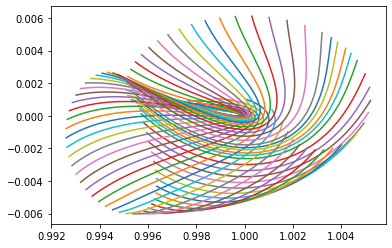

In [3]:
mgen = create_manifold_generator(s0)

mpts = mgen(0, np.pi, 2.6, 3.1, grid=(50, 200))

plt.plot(mpts[:, :, 2], mpts[:, :, 3])
plt.show()

### Create yz-plane generator and generate mesh

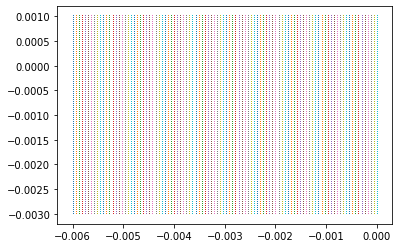

In [4]:
pgen = create_yz_plane_generator(model.mu1)

ppts = pgen(-0.006, 0.000, -0.003, 0.001, (100, 100))

plt.plot(ppts[:, :, 3], ppts[:, :, 4], ',')
plt.show()

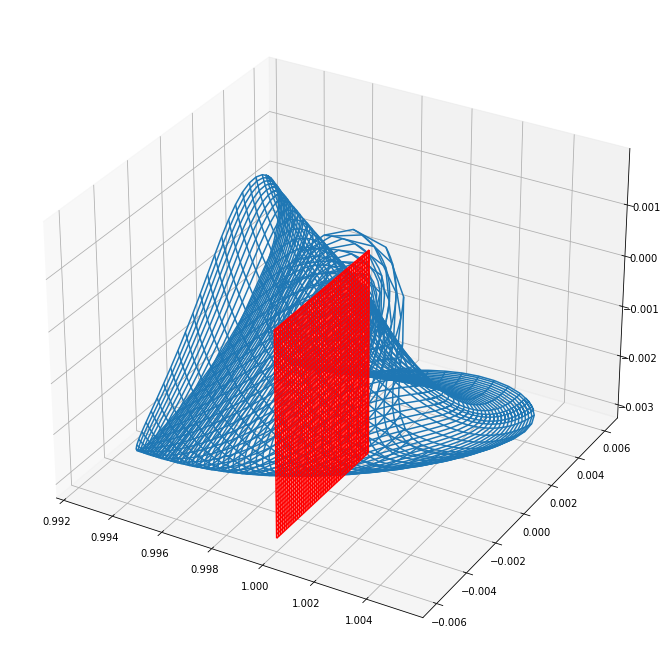

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(mpts[:, :, 2],
                  mpts[:, :, 3],
                  mpts[:, :, 4])

ax.plot_wireframe(ppts[:, :, 2],
                  ppts[:, :, 3],
                  ppts[:, :, 4], color='r')


### Apply intersect3d function to calculated points

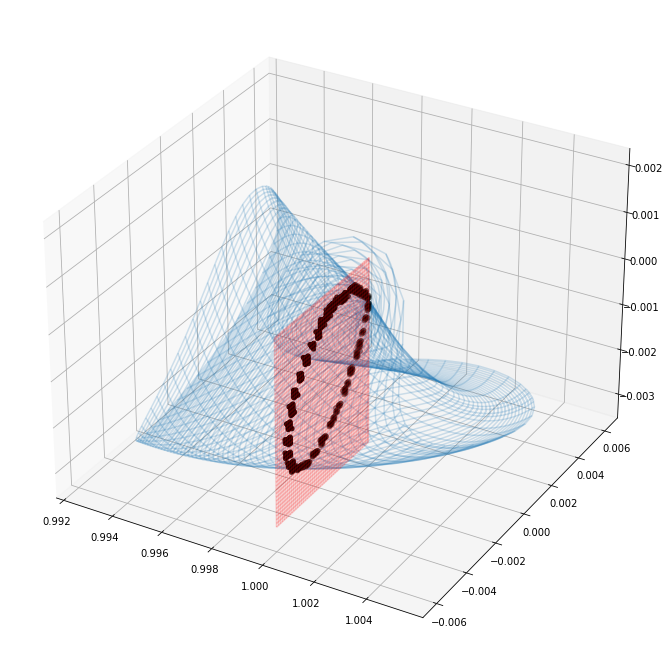

In [6]:
a = ppts.reshape(-1, 5)  # plane
b = mpts.reshape(-1, 5)   # manifold

atol = max(get_bbox(a, b)[2:])
k = 64
rcubes, rpoints, atols = pyi.intersect3d(a, b, atol=atol / k, tree_depth=3)


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(mpts[:, :, 2], mpts[:, :, 3], mpts[:, :, 4], alpha=0.2)
ax.plot_wireframe(ppts[:, :, 2], ppts[:, :, 3], ppts[:, :, 4], color='r', alpha=0.2)
ax.scatter(rpoints[:, 4], rpoints[:, 5], rpoints[:, 6], c='k')

#fig.show()

### Calculate additional points in cubes

In [7]:
p_intervals = calc_nt_intervals(rpoints, 0, 2.0)
m_intervals = calc_nt_intervals(rpoints, 1, 2.0)

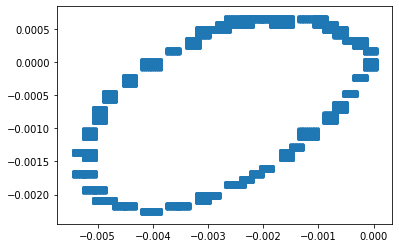

In [8]:
ppoints, ptol = generate_points(pgen, p_intervals, grid=(32, 32))
plt.scatter(ppoints[:, 3], ppoints[:, 4], s=1)

In [9]:
mpoints, mtol = generate_points(mgen, m_intervals, grid=(32, 32))

100%|██████████| 32/32 [00:00<00:00, 232.83it/s]


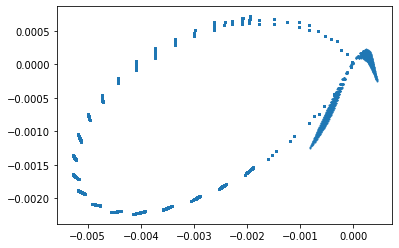

In [10]:
plt.scatter(mpoints[:, 3], mpoints[:, 4], s=1)

### Apply intersect3d function to newly calculated points

In [11]:
a1 = ppoints
b1 = mpoints

atol = max(mtol, ptol)
rcubes1, rpoints1, atols1 = pyi.intersect3d(a1, b1, atol=atol, tree_depth=2)

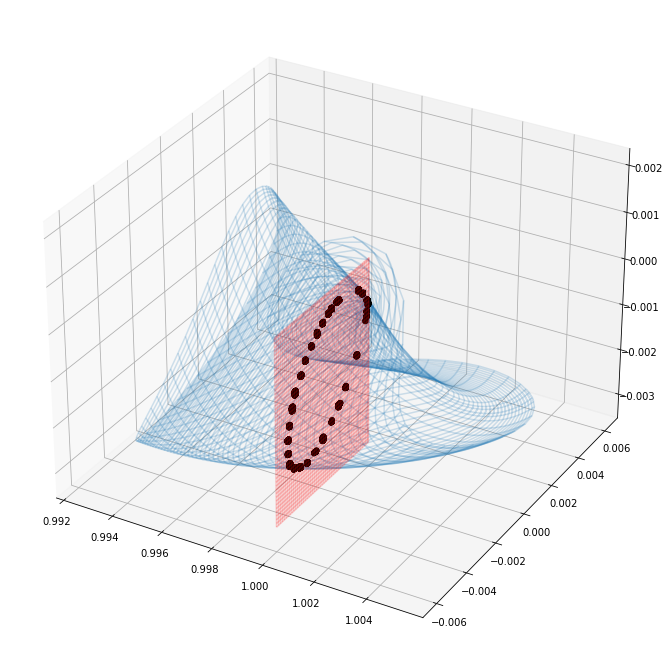

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(mpts[:, :, 2], mpts[:, :, 3], mpts[:, :, 4], alpha=0.2)
ax.plot_wireframe(ppts[:, :, 2], ppts[:, :, 3], ppts[:, :, 4], color='r', alpha=0.2)
ax.scatter(rpoints1[:, 4], rpoints1[:, 5], rpoints1[:, 6], c='k')

### Fit spline in parametric (n, t) space

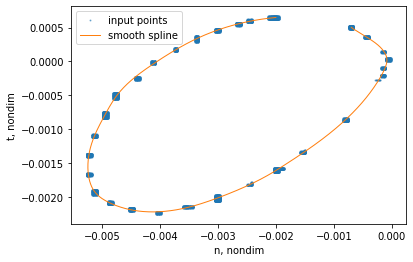

In [13]:
# plane parametric space
spts = fit_spline(rpoints1, m=0, k=3, s=1e-8, n=1000)
plt.plot(*rpoints1[rpoints1[:, 1]==0, 2:4].T, '.', alpha=0.5, ms=2, label='input points')
plt.plot(*spts, '-', lw=1, label='smooth spline')
plt.xlabel('n, nondim')
plt.ylabel('t, nondim')
plt.legend()
plt.show()

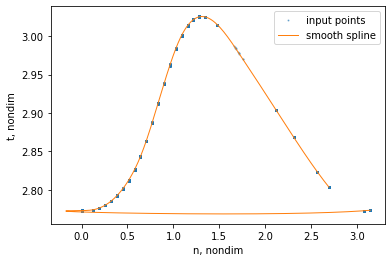

In [14]:
# manifold parametric space
spts = fit_spline(rpoints1, m=1, k=3, s=1e-5, n=1000)
plt.plot(*rpoints1[rpoints1[:, 1]==1, 2:4].T, '.', alpha=0.5, ms=2, label='input points')
plt.plot(*spts, '-', lw=1, label='smooth spline')
plt.xlabel('n, nondim')
plt.ylabel('t, nondim')
plt.legend()
plt.show()